

---                                     

---




# Project Title:  Grizzly Paths :

### Project Description:   I'm working on a project called Grizzly Path to help GGC IT students connect their courses with the skills needed for IT jobs. By analyzing job listings and matching skills with GGC courses, the project gives students the information they need to make smarter decisions about their education and future careers.

---


---




# *Data Cleaning and Analysis Process:*

The data cleaning and analysis process was key to Grizzly Path, where I took steps to make sure the dataset was clear, accurate, and helpful.

## Data Collection:

I used web scraping to collect job listing data from Glassdoor, focusing on job titles, required skills, and industry sectors. Additionally, I obtained extra data from Data.gov to provide more depth to the analysis.

## *Data Cleaning:*

### Handling Missing Data:
 Missing or incomplete entries were identified and either filled with relevant data or removed.

# Standardizing Data:
 I simplified skill names and job titles to make the data more consistent, so similar roles and skills could be easily compared.

### Removing Duplicates:
 Duplicate entries were removed to ensure the dataset represented a variety of job roles and skill sets.

## Data Transformation:

I pulled out the skills from job titles and descriptions based on common keywords. Then grouped into categories to help identify the main areas of expertise needed for different roles. Alowing for a clearer understanding of the key skills required in the job market.


# *Data Analysis:*

I analyzed the data to identify the most frequently requested skills across different job roles. This helped highlight the skills in highest demand in the IT job market.


### Mapping Skills to GGC Courses:
I then mapped these key skills to relevant GGC courses to show students which courses would best prepare them for the skills needed in their desired roles.
Visualization:

### Visualization:
I created a sunburst chart to show the connection between IT majors and skills, a word cloud for job titles, a violin plot to display skills popularity over time, a bar graph for the top 10 most in-demand IT skills, and a pie chart for IT job distribution by industry. These visualizations, like word clouds and bar charts, make it easier for students to understand which skills are trending in the job market and how they relate to GGC courses.



---



In [ ]:
#importing libraries and tools
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from nltk.probability import FreqDist



In [ ]:
#loading the data
jobs_data = pd.read_csv('/content/drive/MyDrive/jobs.csv')
glassdoor_data = pd.read_csv('/content/drive/MyDrive/Glassdoor job listings information.csv')


In [ ]:
jobs_data.head()

,Unnamed: 0,Job Salary,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,0,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [ ]:
jobs_data.isnull().sum()

,0
Unnamed: 0,0
Job Salary,0
Job Experience Required,0
Key Skills,0
Role Category,0
Functional Area,0
Industry,0
Job Title,0


In [ ]:
new_jobs_data = jobs_data.drop(columns=['Job Salary','Unnamed: 0'])
new_jobs_data.head()


,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [ ]:
new_jobs_data.to_csv('new_jobs_data.csv', index=False)
df = pd.read_csv('new_jobs_data.csv')
df.head()



,Job Experience Required,Key Skills,Role Category,Functional Area,Industry,Job Title
0,5 - 10 yrs,Media Planning| Digital Media,Advertising,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [ ]:
new_jobs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27010 entries, 0 to 27009
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Job Experience Required  27010 non-null  object
 1   Key Skills               27010 non-null  object
 2   Role Category            27010 non-null  object
 3   Functional Area          27010 non-null  object
 4   Industry                 27010 non-null  object
 5   Job Title                27010 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


In [ ]:
job_10=new_jobs_data['Role Category'].value_counts()[:10].rename_axis('Job Role').reset_index(name='Count')
job_10.style.background_gradient(cmap='Greys')

,Job Role,Count
0,Programming & Design,8365
1,Voice,2344
2,Retail Sales,2316
3,HR/ Recruitment / IR,1097
4,Admin/Maintenance/Security/Datawarehousing,910
5,Accounts,862
6,Senior Management,856
7,Other,850
8,Corporate Sales,694
9,Production/Manufacturing/Maintenance,569


In [ ]:
desc_stats = df.describe(include='all')
print(desc_stats)

       Job Experience Required  \
count                    27010   
unique                     246   
top                  2 - 5 yrs   
freq                      1859   

                                            Key Skills         Role Category  \
count                                            27010                 27010   
unique                                           25292                   205   
top      Counselor| Mentor| Trainer| Advisor| Teaching  Programming & Design   
freq                                               102                  8365   

                                          Functional Area  \
count                                               27010   
unique                                                 69   
top     IT Software - Application Programming , Mainte...   
freq                                                 7230   

                              Industry           Job Title  
count                            27010               27010  


In [ ]:
# Count of Job Titles per Industry
industry_count = df.groupby('Industry')['Job Title'].count()
print(industry_count)


Industry
* A US based $4.0 billion world leader in staffing services to over 6000 customers globally. * World's largest "Technology" staffing company in the world today - IT, Telecom, Infrastructure and Engineering. * TEKsystems is a part of Allegis Group which is a $16.0 Billion US based privately held firm. One of the world's largest privately held companies (source: Forbes) * The 6th Largest staffing company in the world and the 2nd Largest in the US. * One of the top vendors to 90% of Fortune 500 companies. * Every year we deploy over 80,000 employees across different parts of the world. * Operations in North America, Europe and Asia with over 300 offices across locations. * In India, TEKsystems currently has 1000+ technical consultants employed at various Fortune 500 companies across the country. * For the second consecutive year, TEKsystems was named to Fortune magazine's "100 Best Companies to Work For" in 2014. * Please visit - www.teksystems.com ; www.allegisgroup.com, for mor

In [ ]:
   # Mapping majors to skills
data = {
    "ggc_major": [
        "Software Development", "Software Development", "Software Development", "Software Development", "Software Development",
        "Data Science and Analytics", "Data Science and Analytics", "Data Science and Analytics", "Data Science and Analytics", "Data Science and Analytics",
        "Digital Media", "Digital Media", "Digital Media", "Digital Media", "Digital Media",
        "Systems and Security", "Systems and Security", "Systems and Security", "Systems and Security", "Systems and Security",
        "Enterprise Systems", "Enterprise Systems", "Enterprise Systems", "Enterprise Systems", "Enterprise Systems"
    ],
    "skills": [
        "Python", "Java", "SQL", "DevOps", "Cloud Services",
        "R", "Python", "SQL", "cloud computing", "hadoop",
        "Adobe Photoshop", "Illustrator", "Video Editing", "HTML", "SEO",
        "Network Security", "Cybersecurity", "Penetration Testing", "Linux", "Cloud Security",
        "ERP Systems", "CRM", "Database Management", "BI", "Cloud Computing"
    ],
    "count": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1,1,1,1]
}

df = pd.DataFrame(data)

# Creating a sunburst chart
fig = px.sunburst(df,
                  path=['ggc_major', 'skills'],
                  values='count',
                  title="Sunburst Chart: IT Majors and Skills")

fig.update_layout(
    autosize=False,
    title_x=0.5,
    width=1000,
    height=720
)

fig.show()


I created a sunburst chart that shows how different IT majors at the college level are connected to specific skills. The inner circle represents the major, and as you move outward, you see the skills tied to that major. Students can interact with the chart by clicking on different sections to explore skills linked to each major. This visual tool helps students quickly understand which skills are important for their chosen field and gives them a clearer direction on what to focus on as they prepare for their careers.

# GlassdoorJobs


In [ ]:
glassdoor_data.head()

,url,company_url_overview,company_name,company_rating,job_title,job_location,job_overview,company_headquarters,company_founded_year,company_industry,...,company_id,job_application_link,company_website,pay_range_glassdoor_est,pay_median_glassdoor,pay_range_employer_est__DUPLICATE__DUPLICATE,pay_median_employer,pay_range_currency,pay_type,discovery_input
0,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
1,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Data Engineer, Go-to-Market","San Francisco, CA",The application window will be open until at l...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
2,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Legal Specialist, Employment Litigation","Austin, TX",Minimum qualifications:\n\nBachelor's degree o...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
3,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Customer Engineer II, Infrastructure Moderniza...","Charlotte, NC",Note: Google’s hybrid workplace includes remot...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}
4,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,Google,4.3,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,"Mountain View, CA",1998.0,Internet & Web Services,...,9079,https://www.glassdoor.com/partner/jobListing.h...,https://goo.gle/4ehVuXi,NaN,NaN,NaN,NaN,USD,NaN,{}


In [ ]:
#dropping the unnecessary columns from the glassdoor_data
new_glassdoor = glassdoor_data.drop(['url', 'company_url_overview', 'company_rating','company_headquarters', 'company_founded_year','company_revenue', 'company_size', 'percentage_that_recommend_company_to_a friend', 'percentage_that_approve_of_ceo',
                                   'company_ceo', 'company_career_opportunities_rating', 'company_comp_and_benefits_rating', 'company_culture_and_values_rating', 'company_senior_management_rating', 'company_work/life_balance_rating', 'reviews_by_same_job_pros', 'reviews_by_same_job_cons',
                                   'company_benefits_rating', 'company_benefits_employer_summary', 'employee_benefit_reviews', 'job_posting_id', 'company_id', 'job_application_link', 'company_website', 'pay_range_glassdoor_est', 'pay_median_glassdoor',
                                   'pay_range_employer_est__DUPLICATE__DUPLICATE', 'pay_median_employer', 'pay_range_currency', 'pay_type', 'discovery_input'], axis=1)
new_glassdoor.head()

,company_name,job_title,job_location,job_overview,company_industry,company_type,company_sector
0,Google,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
1,Google,"Data Engineer, Go-to-Market","San Francisco, CA",The application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology
2,Google,"Legal Specialist, Employment Litigation","Austin, TX",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
3,Google,"Customer Engineer II, Infrastructure Moderniza...","Charlotte, NC",Note: Google’s hybrid workplace includes remot...,Internet & Web Services,Company - Public,Information Technology
4,Google,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology


In [ ]:

new_glassdoor.to_csv('new_glassdoor.csv', index=False)
df = pd.read_csv('new_glassdoor.csv')
df.head()

,company_name,job_title,job_location,job_overview,company_industry,company_type,company_sector
0,Google,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
1,Google,"Data Engineer, Go-to-Market","San Francisco, CA",The application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology
2,Google,"Legal Specialist, Employment Litigation","Austin, TX",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology
3,Google,"Customer Engineer II, Infrastructure Moderniza...","Charlotte, NC",Note: Google’s hybrid workplace includes remot...,Internet & Web Services,Company - Public,Information Technology
4,Google,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      1000 non-null   object
 1   job_title         1000 non-null   object
 2   job_location      1000 non-null   object
 3   job_overview      1000 non-null   object
 4   company_industry  1000 non-null   object
 5   company_type      1000 non-null   object
 6   company_sector    1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


In [ ]:
#checking all the null values
df.isnull().sum()

,0
company_name,0
job_title,0
job_location,0
job_overview,0
company_industry,0
company_type,0
company_sector,0


In [ ]:
df.describe()

,company_name,job_title,job_location,job_overview,company_industry,company_type,company_sector
count,1000,1000,1000,1000,1000,1000,1000
unique,246,322,106,351,61,9,21
top,Google,Product Manager,"New York, NY",ABOUT GLASSVIEW\nGlassView's mission is to dri...,Internet & Web Services,Company - Public,Information Technology
freq,80,31,159,27,138,455,236


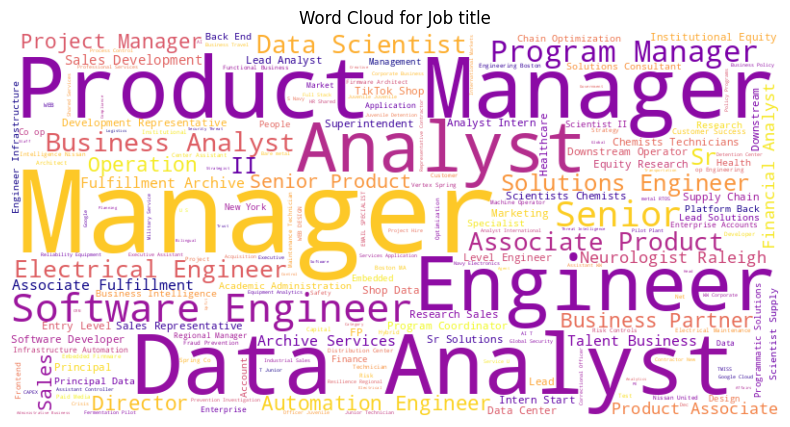

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

In [ ]:
# Word Cloud for Job title
job_title = ' '.join(df['job_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate(job_title)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job title')
plt.show()
plt

In [ ]:
df= pd.DataFrame(new_glassdoor)

skills_keywords = [
    "software", "developer", "programmer", "engineer", "java", "python", "web", "app",
    "data", "engineer", "data science", "analytics", "machine learning", "statistical", "R", "SQL",
    "media", "photography", "design", "video", "content", "social media", "SEO", "illustrator", "photoshop",
    "security", "network", "penetration", "cyber", "linux", "cloud", "firewall", "infrastructure",
    "ERP", "CRM", "database", "business", "cloud computing", "project management", "supply chain"


]
def extract_skills(job_title):
    job_title = job_title.lower()
    return ' '.join([skill for skill in skills_keywords if skill.lower() in job_title])


df['skills'] = df['job_title'].apply(extract_skills)


print(df)



                            company_name  \
0                                 Google   
1                                 Google   
2                                 Google   
3                                 Google   
4                                 Google   
..                                   ...   
995                               TikTok   
996  Albert Einstein College of Medicine   
997                                  AIG   
998        Electrolux Professional Group   
999                              Stryker   

                                             job_title       job_location  \
0           Facilities Manager, Data Center Operations     New Albany, OH   
1                          Data Engineer, Go-to-Market  San Francisco, CA   
2              Legal Specialist, Employment Litigation         Austin, TX   
3    Customer Engineer II, Infrastructure Moderniza...      Charlotte, NC   
4           Facilities Manager, Data Center Operations     New Albany, OH   
..       

In [ ]:
df.head()

,company_name,job_title,job_location,job_overview,company_industry,company_type,company_sector,skills
0,Google,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,data R
1,Google,"Data Engineer, Go-to-Market","San Francisco, CA",The application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology,engineer data engineer R
2,Google,"Legal Specialist, Employment Litigation","Austin, TX",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,
3,Google,"Customer Engineer II, Infrastructure Moderniza...","Charlotte, NC",Note: Google’s hybrid workplace includes remot...,Internet & Web Services,Company - Public,Information Technology,engineer engineer R infrastructure
4,Google,"Facilities Manager, Data Center Operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,data R


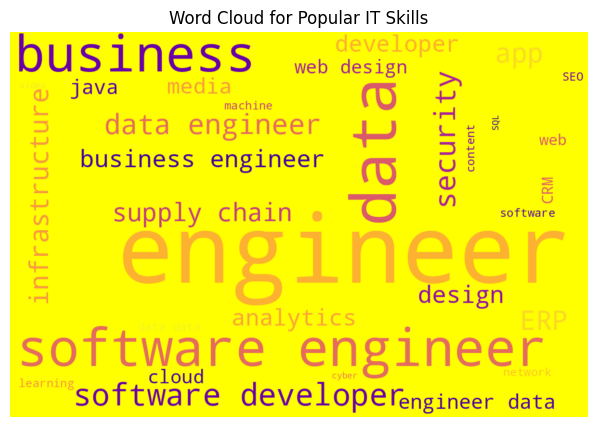

                            company_name  \
0                                 Google   
1                                 Google   
2                                 Google   
3                                 Google   
4                                 Google   
..                                   ...   
995                               TikTok   
996  Albert Einstein College of Medicine   
997                                  AIG   
998        Electrolux Professional Group   
999                              Stryker   

                                             job_title  \
0           Facilities Manager, Data Center Operations   
1                          Data Engineer, Go-to-Market   
2              Legal Specialist, Employment Litigation   
3    Customer Engineer II, Infrastructure Moderniza...   
4           Facilities Manager, Data Center Operations   
..                                                 ...   
995                            Solutions Engineer, Ads   
996    

In [ ]:
df = pd.DataFrame(new_glassdoor)

skills_keywords = [

    "software", "developer", "programmer", "engineer", "java", "python", "web", "app",
    "data", "engineer", "data science", "analytics", "machine learning", "statistical", "R", "SQL",
    "media", "photography", "design", "video", "content", "social media", "SEO", "illustrator", "photoshop",
    "security", "network", "penetration", "cyber", "linux", "cloud", "firewall", "infrastructure",
    "ERP", "CRM", "database", "business", "cloud computing", "project management", "supply chain"


]

# extracting skills from job titles
def extract_skills(job_title):
    job_title = job_title.lower()
    return ' '.join([skill for skill in skills_keywords if skill.lower() in job_title])

# Creating a new column in the DataFrame with the extracted skills
df['skills'] = df['job_title'].apply(extract_skills)

# Created a word cloud of skills mentioned in the job titles
skills_text = ' '.join(df['skills'])
wordcloud = WordCloud(width=1200, height=800, background_color='yellow', colormap='plasma').generate(skills_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Popular IT Skills')
plt.show()

print(df[['company_name', 'job_title', 'skills']])


I extracted relevant skills from job titles using a predefined list of keywords that I created, covering areas like programming, data science, cybersecurity, and business applications. Then, I generated a word cloud to visualize the most frequently mentioned skills in IT job postings. This gives students a clear overview of industry trends and helps them identify emerging skills that could enhance their career opportunities.





In [ ]:
# Filling any missing job titles with Unknown and converting all job titles to lowercase while removing special characters to keep the data clean and consistent.
df['job_title']= df['job_title'].fillna('Unknown').str.lower().str.replace(r'[^\w\s]', '')
df.head()

,company_name,job_title,job_location,job_overview,company_industry,company_type,company_sector,skills
0,Google,"facilities manager, data center operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,data R
1,Google,"data engineer, go-to-market","San Francisco, CA",The application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology,engineer data engineer R
2,Google,"legal specialist, employment litigation","Austin, TX",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,
3,Google,"customer engineer ii, infrastructure moderniza...","Charlotte, NC",Note: Google’s hybrid workplace includes remot...,Internet & Web Services,Company - Public,Information Technology,engineer engineer R infrastructure
4,Google,"facilities manager, data center operations","New Albany, OH",Minimum qualifications:\n\nBachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,data R


In [ ]:
df = pd.DataFrame(new_glassdoor)

# Convert job overview to lowercase for case-insensitive matching
df["job_overview"] = df["job_overview"].astype(str).str.lower()

skills_keywords = [
    "software", "developer", "programmer", "engineer", "java", "python", "web", "app",
    "data", "data science", "analytics", "machine learning", "statistical", "R", "SQL",
    "media", "photography", "design", "video", "content", "social media", "SEO", "illustrator", "photoshop",
    "security", "network", "penetration", "cyber", "linux", "cloud", "firewall", "infrastructure",
    "ERP", "CRM", "database", "business", "cloud computing", "project management", "supply chain"
]

# Extracting the  skills from job_overview
def extract_skills(text):
    matched_skills = [skill for skill in skills_keywords if re.search(rf"\b{skill}\b", text)]
    return " ".join(matched_skills) if matched_skills else None

df["skills"] = df["job_overview"].apply(extract_skills)

# Display the updated DataFrame
print(df[["job_title", "job_overview", "skills"]].head())

                                           job_title  \
0         Facilities Manager, Data Center Operations   
1                        Data Engineer, Go-to-Market   
2            Legal Specialist, Employment Litigation   
3  Customer Engineer II, Infrastructure Moderniza...   
4         Facilities Manager, Data Center Operations   

                                        job_overview  \
0  minimum qualifications:\n\nbachelor's degree o...   
1  the application window will be open until at l...   
2  minimum qualifications:\n\nbachelor's degree o...   
3  note: google’s hybrid workplace includes remot...   
4  minimum qualifications:\n\nbachelor's degree o...   

                                              skills  
0                       data infrastructure business  
1     java python data statistical database business  
2                             engineer data business  
3  software engineer security penetration cloud i...  
4                       data infrastructure busines

In [ ]:
#Created a column that represents the years for each job role, which will help track how skills demand changes  over time.
years = [2025, 2024, 2023, 2022]
df['work_year'] = np.tile(years, len(df) // len(years))[:len(df)]
df.head()

,company_name,job_title,job_location,job_overview,company_industry,company_type,company_sector,skills,work_year
0,Google,"Facilities Manager, Data Center Operations","New Albany, OH",minimum qualifications:\n\nbachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,data infrastructure business,2025
1,Google,"Data Engineer, Go-to-Market","San Francisco, CA",the application window will be open until at l...,Internet & Web Services,Company - Public,Information Technology,java python data statistical database business,2024
2,Google,"Legal Specialist, Employment Litigation","Austin, TX",minimum qualifications:\n\nbachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,engineer data business,2023
3,Google,"Customer Engineer II, Infrastructure Moderniza...","Charlotte, NC",note: google’s hybrid workplace includes remot...,Internet & Web Services,Company - Public,Information Technology,software engineer security penetration cloud i...,2022
4,Google,"Facilities Manager, Data Center Operations","New Albany, OH",minimum qualifications:\n\nbachelor's degree o...,Internet & Web Services,Company - Public,Information Technology,data infrastructure business,2025


In [ ]:
fig = px.violin(df,
                x='work_year',
                y='skills',
                color='work_year',
                box=True,
                points="all",
                labels={'work_year': 'Year', 'skills': 'Skills', 'count': 'Skill Count'},
                title='<b>Skills Popularity Over Time</b>',
                template='seaborn')
fig.show()


This graph shows how different skills are becoming more popular over time, helping students see which ones are in demand. I used job role data and the skills needed for those roles, then grouped them by year to track their growth. Each year is shown with a different color, making it easy for students to compare which skills are trending. I chose the violin plot because it clearly shows how skills are spread over time, not just the trends but also how common each skill is in different years. This will help students know which skills to focus on as they prepare to apply for jobs or internships. By keeping up with the right skills, students will have a better chance in the job market and be ready for the future

In [ ]:
# Splitting skills and count
all_skills = " ".join(df['skills'].dropna()).split()
skill_counts = Counter(all_skills)

skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)


fig = px.bar(skill_df.head(10),
             x='Skill',
             y='Count',
             color='Skill',
             title="<b>Top 10 Most In-Demand IT Skills</b>",
             template='seaborn')
fig.show()


In [ ]:
fig = px.pie(df,
             names='company_sector',
             title="<b>IT Job Distribution by Industry</b>",
             hole=0.3)
fig.show()
